# Flight price prediction

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Huh! Here we take on the challenge! As data scientists, we are gonna prove that given the right data anything can be predicted. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records

Size of test set: 2671 records

FEATURES:
Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
train = pd.read_excel(r'C:\Users\Anuradha\Downloads\Flight_Ticket\Data_Train.xlsx')
test = pd.read_excel(r'C:\Users\Anuradha\Downloads\Flight_Ticket\Test_set.xlsx')

In [64]:
train.shape,test.shape

((10683, 11), (2671, 10))

In [65]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [66]:
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [67]:
bigdf = train.append(test,sort = False)

In [68]:
bigdf.shape

(13354, 11)

# feature engineering

In [69]:
bigdf.dtypes

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
dtype: object

In [70]:
bigdf['Date'] =   bigdf['Date_of_Journey'].str.split('/').str[0]
bigdf['Month'] =  bigdf['Date_of_Journey'].str.split('/').str[1]
bigdf['Year']  = bigdf['Date_of_Journey'].str.split('/').str[2]


In [71]:
bigdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
 11  Date             13354 non-null  object 
 12  Month            13354 non-null  object 
 13  Year             13354 non-null  object 
dtypes: float64(1), object(13)
memory usage: 1.5+ MB


In [72]:
bigdf['Date']= bigdf['Date'].astype('int')
bigdf['Month']= bigdf['Month'].astype('int')
bigdf['Year']= bigdf['Year'].astype('int')

In [73]:
bigdf.dtypes

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
Date                 int32
Month                int32
Year                 int32
dtype: object

In [74]:
bigdf['Arrival_Time'] =   bigdf['Arrival_Time'].str.split(' ').str[0]

In [75]:
bigdf.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


In [78]:
bigdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
 11  Date             13354 non-null  int32  
 12  Month            13354 non-null  int32  
 13  Year             13354 non-null  int32  
dtypes: float64(1), int32(3), object(10)
memory usage: 1.4+ MB


In [77]:
bigdf[bigdf['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25,23h 40m,NaN,No info,7480.0,6,5,2019


In [80]:
bigdf['Total_Stops'] =   bigdf['Total_Stops'].fillna('1 stop')

In [81]:
bigdf['Total_Stops'] =  bigdf['Total_Stops'].replace('non-stop','0 stop')

In [82]:
bigdf['Stops'] = bigdf['Total_Stops'].str.split(' ').str[0]

In [83]:
bigdf['Stops'] = bigdf['Stops'].astype(int)

In [84]:
bigdf.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Stops
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,0 stop,No info,3897.0,24,3,2019,0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019,2
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019,2
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019,1
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019,1


In [85]:
bigdf.dtypes

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
Date                 int32
Month                int32
Year                 int32
Stops                int32
dtype: object

In [94]:
bigdf['Route_1'] = bigdf['Route'].str.split('→ ').str[0]
bigdf['Route_2'] = bigdf['Route'].str.split('→ ').str[1]
bigdf['Route_3'] = bigdf['Route'].str.split('→ ').str[2]
bigdf['Route_4'] = bigdf['Route'].str.split('→ ').str[3]
bigdf['Route_5'] = bigdf['Route'].str.split('→ ').str[4]


In [95]:
bigdf.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Stops,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,0 stop,No info,3897.0,24,3,2019,0,BLR,DEL,NaN,NaN,NaN
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019,2,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019,2,DEL,LKO,BOM,COK,NaN
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019,1,CCU,NAG,BLR,NaN,NaN
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019,1,BLR,NAG,DEL,NaN,NaN


In [98]:
bigdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13354 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
 11  Date             13354 non-null  int32  
 12  Month            13354 non-null  int32  
 13  Year             13354 non-null  int32  
 14  Stops            13354 non-null  int32  
 15  Route_1          13353 non-null  object 
 16  Route_2          13353 non-null  object 
 17  Route_3      

In [100]:
bigdf['Route_1'].fillna("None",inplace = True)
bigdf['Route_2'].fillna("None",inplace = True)
bigdf['Route_3'].fillna("None",inplace = True)
bigdf['Route_4'].fillna("None",inplace = True)  
bigdf['Route_5'].fillna("None",inplace = True)

In [101]:
bigdf['Price'].fillna(bigdf['Price'].mean(),inplace = True)

In [102]:
bigdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13354 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            13354 non-null  float64
 11  Date             13354 non-null  int32  
 12  Month            13354 non-null  int32  
 13  Year             13354 non-null  int32  
 14  Stops            13354 non-null  int32  
 15  Route_1          13354 non-null  object 
 16  Route_2          13354 non-null  object 
 17  Route_3      

In [103]:
bigdf['Arrival_Hour'] = bigdf['Arrival_Time'].str.split(':').str[0]
bigdf['Arrival_Minute'] = bigdf['Arrival_Time'].str.split(':').str[1]

In [104]:
bigdf['Dep_Hour'] = bigdf['Dep_Time'].str.split(':').str[0]
bigdf['Dep_Minute'] = bigdf['Dep_Time'].str.split(':').str[1]

In [105]:
bigdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13354 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            13354 non-null  float64
 11  Date             13354 non-null  int32  
 12  Month            13354 non-null  int32  
 13  Year             13354 non-null  int32  
 14  Stops            13354 non-null  int32  
 15  Route_1          13354 non-null  object 
 16  Route_2          13354 non-null  object 
 17  Route_3      

In [106]:
bigdf['Arrival_Hour']= bigdf['Arrival_Hour'].astype(int)
bigdf['Arrival_Minute']= bigdf['Arrival_Minute'].astype(int)
bigdf['Dep_Hour']= bigdf['Dep_Hour'].astype(int)
bigdf['Dep_Minute']= bigdf['Dep_Minute'].astype(int)

In [110]:
bigdf = bigdf.drop(['Date_of_Journey','Route','Duration','Total_Stops','Dep_Time','Arrival_Time'],axis=1)

In [112]:
bigdf.isnull().sum()

Airline            0
Source             0
Destination        0
Additional_Info    0
Price              0
Date               0
Month              0
Year               0
Stops              0
Route_1            0
Route_2            0
Route_3            0
Route_4            0
Route_5            0
Arrival_Hour       0
Arrival_Minute     0
Dep_Hour           0
Dep_Minute         0
dtype: int64

In [114]:
bigdf.head()

,Airline,Source,Destination,Additional_Info,Price,Date,Month,Year,Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute
0,IndiGo,Banglore,New Delhi,No info,3897.0,24,3,2019,0,BLR,DEL,None,None,None,1,10,22,20
1,Air India,Kolkata,Banglore,No info,7662.0,1,5,2019,2,CCU,IXR,BBI,BLR,None,13,15,5,50
2,Jet Airways,Delhi,Cochin,No info,13882.0,9,6,2019,2,DEL,LKO,BOM,COK,None,4,25,9,25
3,IndiGo,Kolkata,Banglore,No info,6218.0,12,5,2019,1,CCU,NAG,BLR,None,None,23,30,18,5
4,IndiGo,Banglore,New Delhi,No info,13302.0,1,3,2019,1,BLR,NAG,DEL,None,None,21,35,16,50


In [115]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
bigdf['Airline'] = encoder.fit_transform(bigdf['Airline'])
bigdf['Source'] = encoder.fit_transform(bigdf['Source'])
bigdf['Destination'] = encoder.fit_transform(bigdf['Destination'])
bigdf['Additional_Info'] = encoder.fit_transform(bigdf['Additional_Info'])
bigdf['Route_1'] = encoder.fit_transform(bigdf['Route_1'])
bigdf['Route_2'] = encoder.fit_transform(bigdf['Route_2'])
bigdf['Route_3'] = encoder.fit_transform(bigdf['Route_3'])
bigdf['Route_4'] = encoder.fit_transform(bigdf['Route_4'])
bigdf['Route_5'] = encoder.fit_transform(bigdf['Route_5'])

In [116]:
bigdf.head()

,Airline,Source,Destination,Additional_Info,Price,Date,Month,Year,Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute
0,3,0,5,8,3897.0,24,3,2019,0,0,13,24,12,4,1,10,22,20
1,1,3,0,8,7662.0,1,5,2019,2,2,25,1,3,4,13,15,5,50
2,4,2,1,8,13882.0,9,6,2019,2,3,32,4,5,4,4,25,9,25
3,3,3,0,8,6218.0,12,5,2019,1,2,34,3,12,4,23,30,18,5
4,3,0,5,8,13302.0,1,3,2019,1,0,34,8,12,4,21,35,16,50


# Feature selection

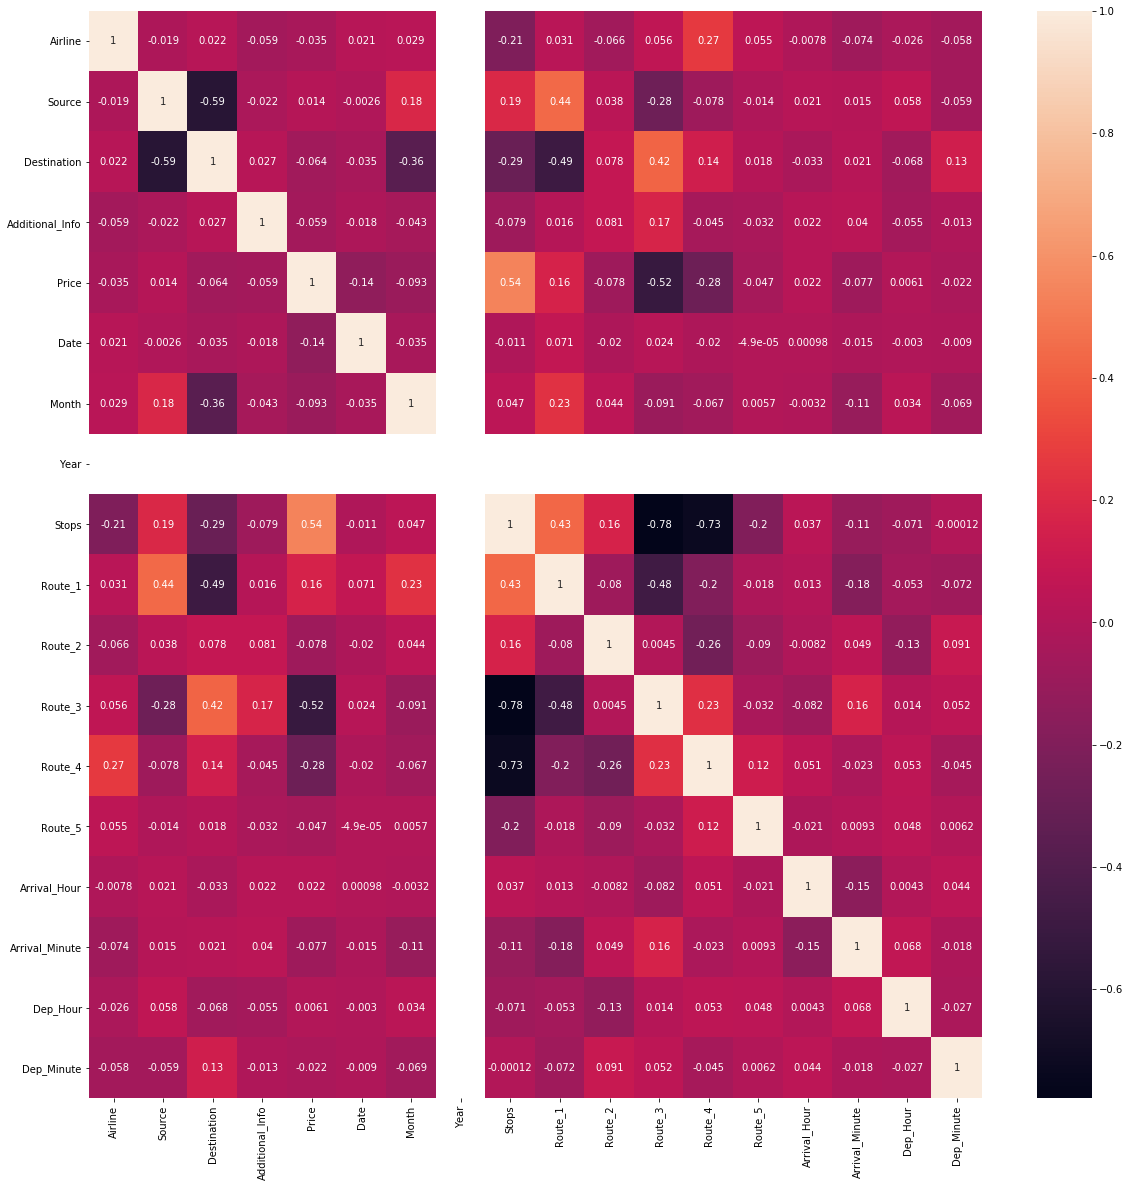

In [119]:
corr_math = bigdf.corr()
top_corr_features = corr_math.index
plt.figure(figsize = (20,20))
g = sns.heatmap(bigdf[top_corr_features].corr(),annot=True)

In [120]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [125]:
bigdf.shape

(13354, 18)

In [126]:
train_df = bigdf[0:10683] #originally we have train.shape (10683,11),so again spliting into train and test datasets
test_df = bigdf[10683:]

In [130]:
train_df.shape,test_df.shape

((10683, 18), (2671, 18))

In [136]:
x = train_df.drop(['Price'],axis =1)

In [137]:
y= train_df.Price

In [138]:
from sklearn.model_selection import train_test_split

In [139]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 0)

In [140]:
model = SelectFromModel(Lasso(alpha = 0.005, random_state=0))

In [141]:
model.fit(x_train,y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [142]:
model.get_support()

array([ True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [143]:
selected_features = x_train.columns[(model.get_support())]

In [144]:
selected_features

Index(['Airline', 'Source', 'Destination', 'Additional_Info', 'Date', 'Month',
       'Stops', 'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5',
       'Arrival_Hour', 'Arrival_Minute', 'Dep_Hour', 'Dep_Minute'],
      dtype='object')

In [145]:
x_train = x_train.drop(['Year'],axis = 1)

In [146]:
x_test = x_test.drop(['Year'],axis = 1)

# RandomForestRegressor

In [157]:
from sklearn.model_selection import RandomizedSearchCV

In [158]:
n_estimators = [int(x) for x in np.linspace(100 ,1200 , num = 12)]
max_features = ['auto','sqrt']
max_depth = [int(x) for x in np.linspace(5,30,num =6)]
min_samples_split = [2,5,10,15,100]
min_samples_leaf = [1,2,5,10]

In [159]:
random_grid = {'n_estimators':n_estimators,
                 'max_features':max_features,
                  'max_depth':max_depth,
                   'min_samples_split':min_samples_leaf,
                    'min_samples_leaf':min_samples_leaf }

In [165]:
print(random_grid )

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [1, 2, 5, 10], 'min_samples_leaf': [1, 2, 5, 10]}  


In [166]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [168]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 20, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [169]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=15 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=15, total=  11.7s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=15 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.6s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=15, total=  12.5s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=15 
[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=15, total=  11.6s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=15 
[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=15, total=  11.9s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=15 
[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=15, total=  11.2s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=5, max_features=auto, max_depth=20 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=5, max_features=auto, max_depth=20, total=  13.2s
[CV] n_estimators=1100, min_samples_split

C:\Users\Anuradha\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  n_estimators=700, min_samples_split=1, min_samples_leaf=5, max_features=auto, max_depth=25, total=   0.3s
[CV] n_estimators=700, min_samples_split=1, min_samples_leaf=5, max_features=auto, max_depth=25 


C:\Users\Anuradha\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  n_estimators=700, min_samples_split=1, min_samples_leaf=5, max_features=auto, max_depth=25, total=   0.3s
[CV] n_estimators=700, min_samples_split=1, min_samples_leaf=5, max_features=auto, max_depth=25 


C:\Users\Anuradha\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  n_estimators=700, min_samples_split=1, min_samples_leaf=5, max_features=auto, max_depth=25, total=   0.3s
[CV] n_estimators=700, min_samples_split=1, min_samples_leaf=5, max_features=auto, max_depth=25 


C:\Users\Anuradha\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  n_estimators=700, min_samples_split=1, min_samples_leaf=5, max_features=auto, max_depth=25, total=   0.4s
[CV] n_estimators=700, min_samples_split=1, min_samples_leaf=5, max_features=auto, max_depth=25 


C:\Users\Anuradha\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  n_estimators=700, min_samples_split=1, min_samples_leaf=5, max_features=auto, max_depth=25, total=   0.3s
[CV] n_estimators=1000, min_samples_split=1, min_samples_leaf=2, max_features=sqrt, max_depth=30 


C:\Users\Anuradha\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  n_estimators=1000, min_samples_split=1, min_samples_leaf=2, max_features=sqrt, max_depth=30, total=   0.5s
[CV] n_estimators=1000, min_samples_split=1, min_samples_leaf=2, max_features=sqrt, max_depth=30 


C:\Users\Anuradha\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  n_estimators=1000, min_samples_split=1, min_samples_leaf=2, max_features=sqrt, max_depth=30, total=   0.5s
[CV] n_estimators=1000, min_samples_split=1, min_samples_leaf=2, max_features=sqrt, max_depth=30 


C:\Users\Anuradha\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  n_estimators=1000, min_samples_split=1, min_samples_leaf=2, max_features=sqrt, max_depth=30, total=   0.5s
[CV] n_estimators=1000, min_samples_split=1, min_samples_leaf=2, max_features=sqrt, max_depth=30 


C:\Users\Anuradha\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  n_estimators=1000, min_samples_split=1, min_samples_leaf=2, max_features=sqrt, max_depth=30, total=   0.5s
[CV] n_estimators=1000, min_samples_split=1, min_samples_leaf=2, max_features=sqrt, max_depth=30 


C:\Users\Anuradha\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  n_estimators=1000, min_samples_split=1, min_samples_leaf=2, max_features=sqrt, max_depth=30, total=   0.5s
[CV] n_estimators=1100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=1100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=10, total=  12.3s
[CV] n_estimators=1100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=1100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=10, total=  12.4s
[CV] n_estimators=1100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=1100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=10, total=  12.6s
[CV] n_estimators=1100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=1100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=10, total=  12.4s
[CV] n_estimators=1100, min_samples_split=5

C:\Users\Anuradha\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  n_estimators=600, min_samples_split=1, min_samples_leaf=10, max_features=auto, max_depth=25, total=   0.5s
[CV] n_estimators=600, min_samples_split=1, min_samples_leaf=10, max_features=auto, max_depth=25 


C:\Users\Anuradha\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  n_estimators=600, min_samples_split=1, min_samples_leaf=10, max_features=auto, max_depth=25, total=   0.4s
[CV] n_estimators=600, min_samples_split=1, min_samples_leaf=10, max_features=auto, max_depth=25 


C:\Users\Anuradha\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  n_estimators=600, min_samples_split=1, min_samples_leaf=10, max_features=auto, max_depth=25, total=   0.3s
[CV] n_estimators=600, min_samples_split=1, min_samples_leaf=10, max_features=auto, max_depth=25 


C:\Users\Anuradha\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  n_estimators=600, min_samples_split=1, min_samples_leaf=10, max_features=auto, max_depth=25, total=   0.3s
[CV] n_estimators=600, min_samples_split=1, min_samples_leaf=10, max_features=auto, max_depth=25 


C:\Users\Anuradha\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Anuradha\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Anuradha\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0

[CV]  n_estimators=600, min_samples_split=1, min_samples_leaf=10, max_features=auto, max_depth=25, total=   0.3s
[CV] n_estimators=200, min_samples_split=1, min_samples_leaf=1, max_features=auto, max_depth=15 
[CV]  n_estimators=200, min_samples_split=1, min_samples_leaf=1, max_features=auto, max_depth=15, total=   0.1s
[CV] n_estimators=200, min_samples_split=1, min_samples_leaf=1, max_features=auto, max_depth=15 
[CV]  n_estimators=200, min_samples_split=1, min_samples_leaf=1, max_features=auto, max_depth=15, total=   0.1s
[CV] n_estimators=200, min_samples_split=1, min_samples_leaf=1, max_features=auto, max_depth=15 


C:\Users\Anuradha\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Anuradha\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Anuradha\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0

[CV]  n_estimators=200, min_samples_split=1, min_samples_leaf=1, max_features=auto, max_depth=15, total=   0.1s
[CV] n_estimators=200, min_samples_split=1, min_samples_leaf=1, max_features=auto, max_depth=15 
[CV]  n_estimators=200, min_samples_split=1, min_samples_leaf=1, max_features=auto, max_depth=15, total=   0.1s
[CV] n_estimators=200, min_samples_split=1, min_samples_leaf=1, max_features=auto, max_depth=15 
[CV]  n_estimators=200, min_samples_split=1, min_samples_leaf=1, max_features=auto, max_depth=15, total=   0.1s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=20 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=20, total=   1.8s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=20 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=20, total=   1.8s
[CV] n_estimators=400, min_samples_split=5, min_

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  9.2min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [180]:
y_pred = rf_random.predict(x_test)

In [181]:
y_pred

array([ 6184.87241611,  3896.73131991, 11909.57278077, ...,
       11607.27837761, 14279.83572227,  7664.80642593])

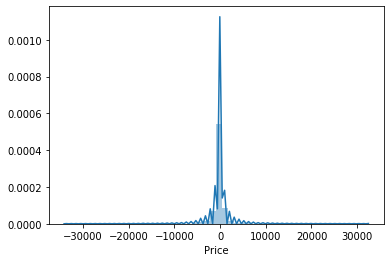

In [183]:
sns.distplot(y_test-y_pred)

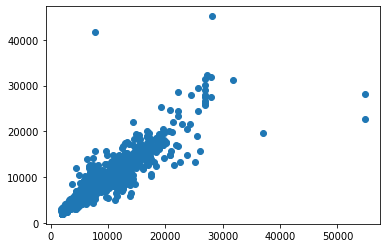

In [184]:
plt.scatter(y_test,y_pred)